In [2]:
# import library

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge

pd.set_option('display.max_rows', 200)


from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pickle


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load data

raw_data = pd.read_csv('../lab_data/Data_Customer.csv')
raw_data.drop(columns='Unnamed: 0', inplace=True)

In [4]:
raw_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
# helper functions

def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    #ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    #ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)
    #MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    #MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))


    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_test, y_pred_test)

    #MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    #MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(y_train ,y_pred_train)
    MSE_test  = mean_squared_error(y_test , y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    #MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    #MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)
    #R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    #R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)


    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance, df_train, df_test

In [6]:
# clean data version 0.1 

raw_data.dropna(inplace=True)
data = raw_data._get_numeric_data()

In [7]:
data.dropna(inplace=True)

data = data[data['Income'] != 0]
#data = data[data['Total Claim Amount'] != 0]
#data = data[data['Months Since Last Claim'] != 0]
#data = data[data['Months Since Policy Inception'] != 0]
#data = data[data['Number of Open Complaints'] != 0]
#data.drop(columns='Number of Policies', inplace=True)


In [8]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
count,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000
mean,8160.017167,50489.356083,93.762908,15.063501,47.707418,0.381899,379.709823
std,7036.816506,23997.430227,35.665165,10.150784,28.015672,0.897789,258.171924
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.000000,0.099007
25%,4140.867103,29099.750000,68.000000,6.000000,23.000000,0.000000,206.549069
50%,5894.138140,48147.500000,83.000000,14.000000,47.000000,0.000000,337.473713
75%,9080.524065,69618.500000,109.000000,23.000000,71.000000,0.000000,500.496965
max,83325.381190,99961.000000,296.000000,35.000000,99.000000,5.000000,2893.239678


In [9]:
y = data['Total Claim Amount']
X = data.drop(columns='Total Claim Amount')

In [10]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
##### First model

#trans = PowerTransformer()
trans = StandardScaler()
model = LinearRegression()


trans.fit(X_train)


X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)


#y_train = trans.transform(y)


X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

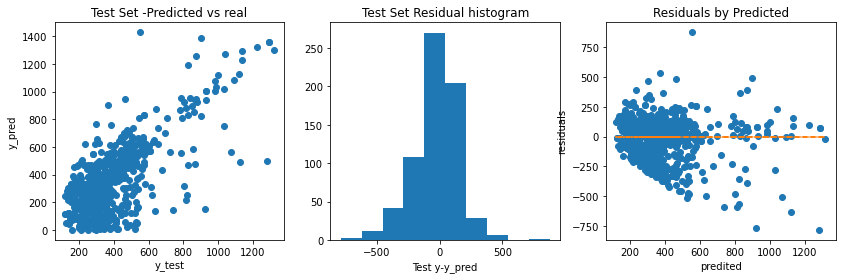

In [12]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test_lm})
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test_lm, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test_lm)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test_lm,y_test - y_pred_test_lm,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test_lm,np.zeros(len(y_pred_test_lm)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

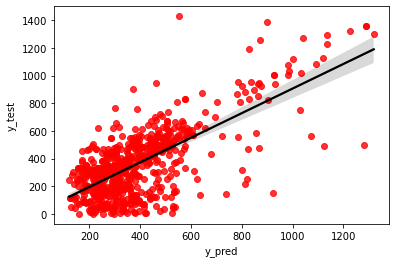

In [13]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [14]:
# second model
mod_lasso = Lasso()

In [39]:
mod_lasso.fit(X_train,y_train)

Lasso()

In [40]:
y_pred_train_lasso = mod_lasso.predict(X_train)
y_pred_test_lasso = mod_lasso.predict(X_test)

In [41]:
per_lasso, _, _ = model_performance(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso)

In [42]:
r2_score(y_train, y_pred_train_lasso)

0.4508823489074584

In [43]:
y_train.describe()

count   2696.00
mean     383.13
std      260.88
min        0.77
25%      211.01
50%      340.80
75%      504.00
max     2893.24
Name: Total Claim Amount, dtype: float64

In [44]:
pd.DataFrame(y_pred_train_lasso).describe()

,0
count,2696.00
mean,383.13
std,173.81
min,108.88
25%,266.92
50%,344.87
75%,461.88
max,1341.77


In [45]:
per_lasso

,Error_metric,Train,Test
0,Mean error,-0.00,-25.41
1,Mean absolute error,136.26,128.63
2,Mean squared error,37358.11,31918.31
3,Root mean squared error,193.28,178.66
4,Mean absolute percentual error,233.63,444.22
5,R2,0.45,0.48


In [19]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=3) # n_neighbors = K

In [20]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=3)

In [21]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)


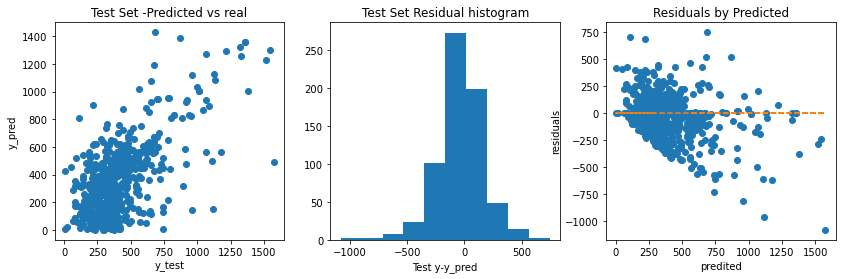

In [22]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test_knn})
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test_knn, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test_knn)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test_knn,y_test - y_pred_test_knn,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test_knn,np.zeros(len(y_pred_test_knn)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

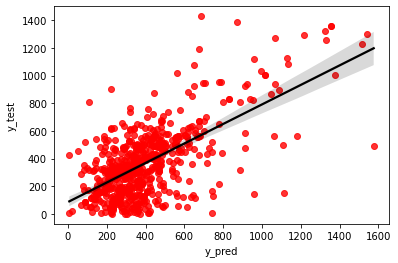

In [23]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [24]:
print(r2_score(y_test, y_pred_test_lm))
print(r2_score(y_test, y_pred_test_knn))

0.47333114096599704
0.3244909217968118


In [25]:
per, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
per_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

In [26]:
per

,Error_metric,Train,Test
0,Mean error,-0.00,-25.51
1,Mean absolute error,136.33,128.72
2,Mean squared error,37350.65,32020.62
3,Root mean squared error,193.26,178.94
4,Mean absolute percentual error,233.47,440.34
5,R2,0.45,0.47


In [27]:
per_knn

,Error_metric,Train,Test
0,Mean error,3.54,-30.24
1,Mean absolute error,103.37,143.46
2,Mean squared error,22538.89,41069.87
3,Root mean squared error,150.13,202.66
4,Mean absolute percentual error,140.29,552.54
5,R2,0.67,0.32


ValueError: Found input variables with inconsistent numbers of samples: [3370, 674]